# Lorenz 吸引子动画

在正确运行动画功能前，先安装 `ffmpeg`(在 `Anaconda` 环境下）：

> conda install -c conda-forge ffmpeg



In [23]:
import matplotlib.pyplot as plt # 导入图形库
from matplotlib import animation,rc
import numpy as np
from scipy.integrate import odeint # 一阶常微分方程组的数值程序
from IPython.display import HTML
%matplotlib inline

### 积分方程

In [48]:
def Lorentz_equation(x,t,sigma,r,b):
    return np.array([sigma*(x[1]-x[0]),r*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-b*x[2]])
    
X0=np.array([0.,1.,0])
sigma = 10
b = 8/3
#r =27 # limit circle
#r = 250 # another limit circle
r= 100
t = np.arange(0,800,0.01)
#t = np.linspace(0, 3, 1000) 

x_t = odeint(Lorentz_equation, X0, t, args=(sigma,r,b))


    

### 画出结果

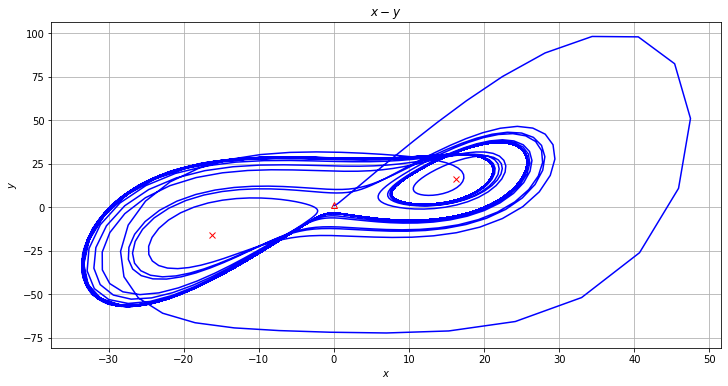

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(x_t[:,0],x_t[:,1],'b-',label="$x$")
plt.plot([X0[0]],[X0[1]],'r^',markerfacecolor="none")
plt.plot([np.sqrt(b*(r-1)),-np.sqrt(b*(r-1))],[np.sqrt(b*(r-1)),-np.sqrt(b*(r-1))],'rx',markerfacecolor="none")
#plt.plot([0],[0],'rx',markerfacecolor="none")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("$x-y$")
#plt.legend(bbox_to_anchor=(0.1,1.))
#plt.ylim(0.625,0.7)
#plt.xlim(150,200)
plt.grid(True)

### 根据上面的结果，确定动画的框架范围

In [1]:
fig,ax = plt.subplots(figsize=(8, 4))
line,= ax.plot([],[],'b--',animated=False)
line2,=ax.plot([],[],'ro',animated=False)
plt.grid(True)
plt.title("$r=$"+str(r))
plt.xlabel("$x$")
plt.ylabel("$y$")

def init():
    ax.set_xlim((-50,50))
    ax.set_ylim((-100,100))
    plt.plot([X0[0]],[X0[1]],'r^',markerfacecolor="none")
    plt.plot([np.sqrt(b*(r-1)),-np.sqrt(b*(r-1))],[np.sqrt(b*(r-1)),-np.sqrt(b*(r-1))],'rx',markerfacecolor="none")
    #line,= ax.plot([],[],'b--',animated=False)
    #line2,=ax.plot([],[],'ro',animated=False)
    return line,line2,


def animate(i):
    i = i*2
    line.set_data(x_t[:i,0],x_t[:i,1])
    line2.set_data(x_t[i,0],x_t[i,1])
    return line,line2,



ani = animation.FuncAnimation(fig=fig,func=animate,frames=800,init_func=init,interval=30,blit=True)
#ani.save('single_pendulum_nodecay.gif', writer='imagemagick', fps=100)
HTML(ani.to_html5_video())
#ani.save('r100.mp4',codec='h264')


NameError: name 'plt' is not defined